In [76]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
file_path = 'combined_results.csv'
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

# 종속 변수와 독립 변수 설정
X = df[['Group', 'LSTM', 'conv', 'augmented', 'frame']]
Y = df['mAP']

# 회귀 분석 모델 적합
print('OLS Regression Results (mAP)')
model = sm.OLS(Y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())
print('=======================================================================================')
print('\n\n\n')
print('OLS Regression Results (ECE)')
# 종속 변수와 독립 변수 설정
X = df[['Group', 'LSTM', 'conv', 'augmented', 'frame']]
Y = df['ECE']

# 회귀 분석 모델 적합
model = sm.OLS(Y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())


OLS Regression Results (mAP)
                                 OLS Regression Results                                
Dep. Variable:                    mAP   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              572.6
Date:                Sun, 09 Jun 2024   Prob (F-statistic):                   1.10e-145
Time:                        18:54:12   Log-Likelihood:                         -42.925
No. Observations:                 288   AIC:                                      95.85
Df Residuals:                     283   BIC:                                      114.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

In [77]:
# 기본 통계 요약
summary_stats = df.describe()
print(summary_stats)
print('==============================================================================')

           Group       LSTM        conv  augmented       frame         mAP  \
count  288.00000  288.00000  288.000000  288.00000  288.000000  288.000000   
mean     0.50000    0.50000    3.500000    0.50000    6.000000    0.936217   
std      0.50087    0.50087    1.710798    0.50087    3.421596    0.021231   
min      0.00000    0.00000    1.000000    0.00000    1.000000    0.852017   
25%      0.00000    0.00000    2.000000    0.00000    3.000000    0.922940   
50%      0.50000    0.50000    3.500000    0.50000    6.000000    0.938402   
75%      1.00000    1.00000    5.000000    1.00000    9.000000    0.952963   
max      1.00000    1.00000    6.000000    1.00000   11.000000    0.974615   

              ECE  normal_acc  mandown_acc   cross_acc  
count  288.000000  288.000000   288.000000  288.000000  
mean     0.513792    0.977585     0.922176    0.908889  
std      0.079425    0.014895     0.020228    0.042429  
min      0.369200    0.890685     0.848939    0.695896  
25%      0.4

In [78]:
# 상관 계수 행렬
correlation_matrix = df.corr()
"""
             Group              LSTM              conv            augmented          frame            mAP           ECE      
Group     1.000000e+00,     1.619075e-17,     1.083467e-17,    -7.709882e-18,     9.074034e-17,    -0.200593,    -0.021783
frame     1.619075e-17,     1.000000e+00,    -5.417334e-18,    -4.009139e-17,     1.986356e-17,     0.031799,    -0.046241
LSTM      1.083467e-17,    -5.417334e-18,     1.000000e+00,     5.327045e-17,     2.114711e-17,     0.036204,     0.044185
augment  -7.709882e-18,    -4.009139e-17,     5.327045e-17,     1.000000e+00,    -1.372391e-16,    -0.138181,    -0.156874
conv      9.074034e-17,     1.986356e-17,     2.114711e-17,    -1.372391e-16,     1.000000e+00,     0.030470,    -0.262099
mAP      -2.005928e-01,     3.179882e-02,     3.620435e-02,    -1.381805e-01,     3.047009e-02,     1.000000,    -0.119297
ECE      -2.178255e-02,    -4.624114e-02,     4.418548e-02,    -1.568738e-01,    -2.620994e-01,    -0.119297,     1.000000
"""

'\n             Group              LSTM              conv            augmented          frame            mAP           ECE      \nGroup     1.000000e+00,     1.619075e-17,     1.083467e-17,    -7.709882e-18,     9.074034e-17,    -0.200593,    -0.021783\nframe     1.619075e-17,     1.000000e+00,    -5.417334e-18,    -4.009139e-17,     1.986356e-17,     0.031799,    -0.046241\nLSTM      1.083467e-17,    -5.417334e-18,     1.000000e+00,     5.327045e-17,     2.114711e-17,     0.036204,     0.044185\naugment  -7.709882e-18,    -4.009139e-17,     5.327045e-17,     1.000000e+00,    -1.372391e-16,    -0.138181,    -0.156874\nconv      9.074034e-17,     1.986356e-17,     2.114711e-17,    -1.372391e-16,     1.000000e+00,     0.030470,    -0.262099\nmAP      -2.005928e-01,     3.179882e-02,     3.620435e-02,    -1.381805e-01,     3.047009e-02,     1.000000,    -0.119297\nECE      -2.178255e-02,    -4.624114e-02,     4.418548e-02,    -1.568738e-01,    -2.620994e-01,    -0.119297,     1.000000\n'

Group별 mAP 평균, 0=Group 사용 안함 // 1 = Group 사용함
Group
0    0.943262
1    0.929172
Name: mAP, dtype: float64


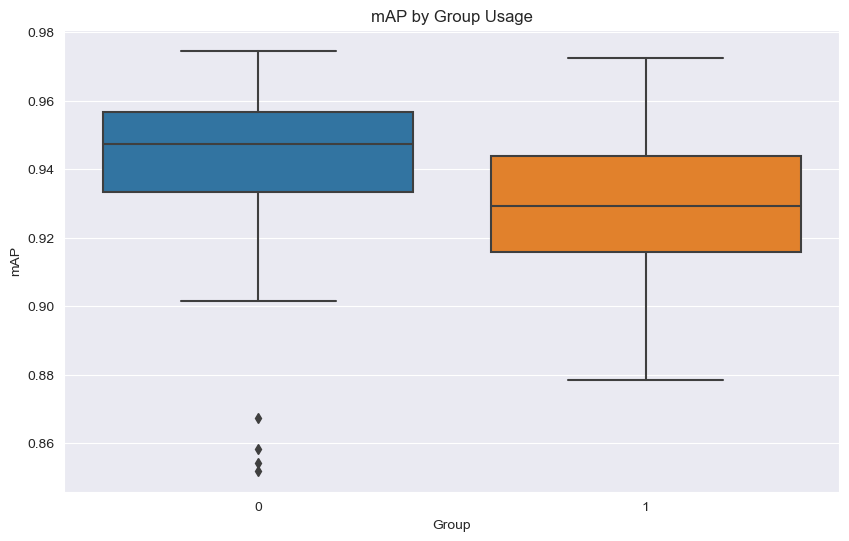

In [79]:
# Group에 따른 mAP 평균 계산
group_Group = df.groupby('Group')['mAP'].mean()
print("Group별 mAP 평균, 0=Group 사용 안함 // 1 = Group 사용함")
print(group_Group)
print('==============================================================================')
# Boxplot으로 mAP 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='mAP', data=df)
plt.title('mAP by Group Usage')
plt.show()

LSTM별 mAP 평균 0=LSTM 사용 안함 // 1 = LSTM 사용함
LSTM
0    0.935907
1    0.936527
Name: mAP, dtype: float64


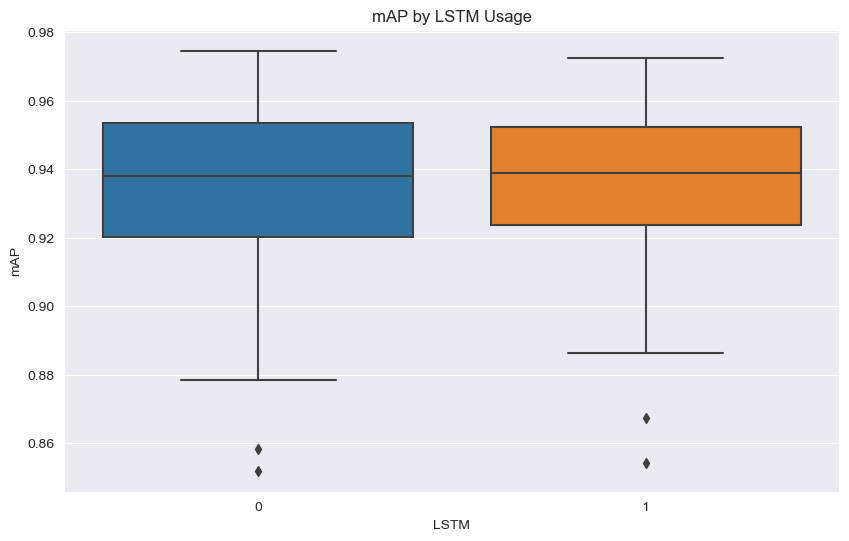

In [80]:
# LSTM에 따른 mAP 평균 계산
LSTM_Group = df.groupby('LSTM')['mAP'].mean()
print("LSTM별 mAP 평균", "0=LSTM 사용 안함 // 1 = LSTM 사용함")
print(LSTM_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='LSTM', y='mAP', data=df)
plt.title('mAP by LSTM Usage')
plt.show()

augmented별 mAP 평균 0=augmented 사용 안함 // 1 = augmented 사용함
augmented
0    0.935652
1    0.936781
Name: mAP, dtype: float64


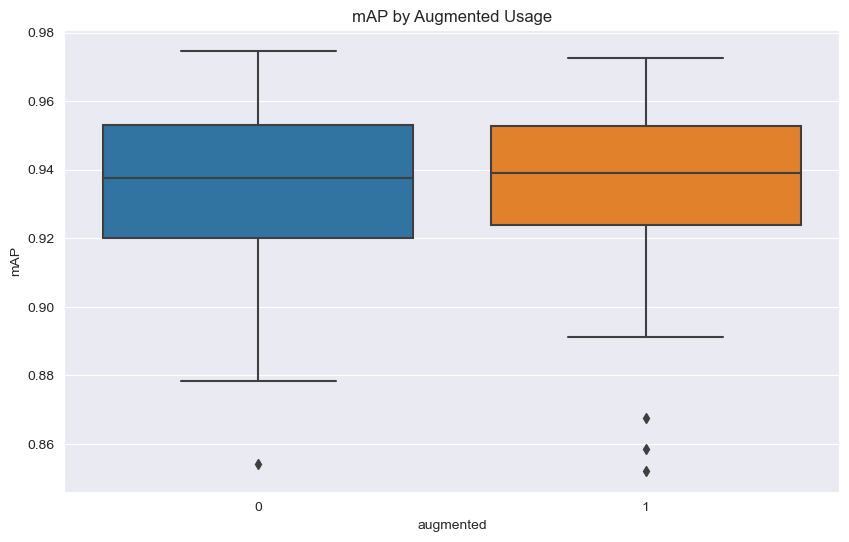

In [81]:
# augmented에 따른 mAP 평균 계산
augmented_Group = df.groupby('augmented')['mAP'].mean()
print("augmented별 mAP 평균", "0=augmented 사용 안함 // 1 = augmented 사용함")
print(augmented_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='mAP', data=df)
plt.title('mAP by Augmented Usage')
plt.show()

augmented별 mAP 평균 0=augmented 사용 안함 // 1 = augmented 사용함
augmented
0    0.973329
1    0.981841
Name: normal_acc, dtype: float64


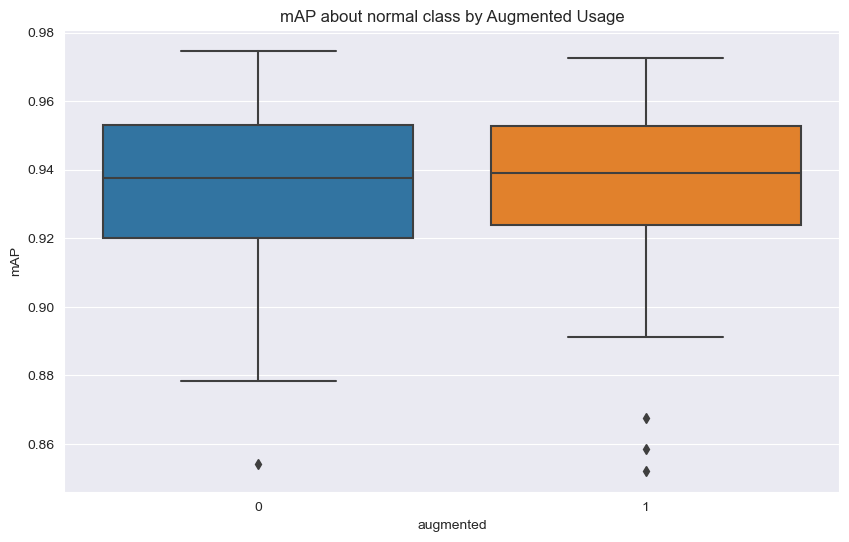

In [82]:
# augmented에 따른 normal category의 mAP 평균 계산
augmented_Group = df.groupby('augmented')['normal_acc'].mean()
print("augmented별 mAP 평균", "0=augmented 사용 안함 // 1 = augmented 사용함")
print(augmented_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='mAP', data=df)
plt.title('mAP about normal class by Augmented Usage')
plt.show()

augmented별 mAP 평균 0=augmented 사용 안함 // 1 = augmented 사용함
augmented
0    0.923636
1    0.920717
Name: mandown_acc, dtype: float64


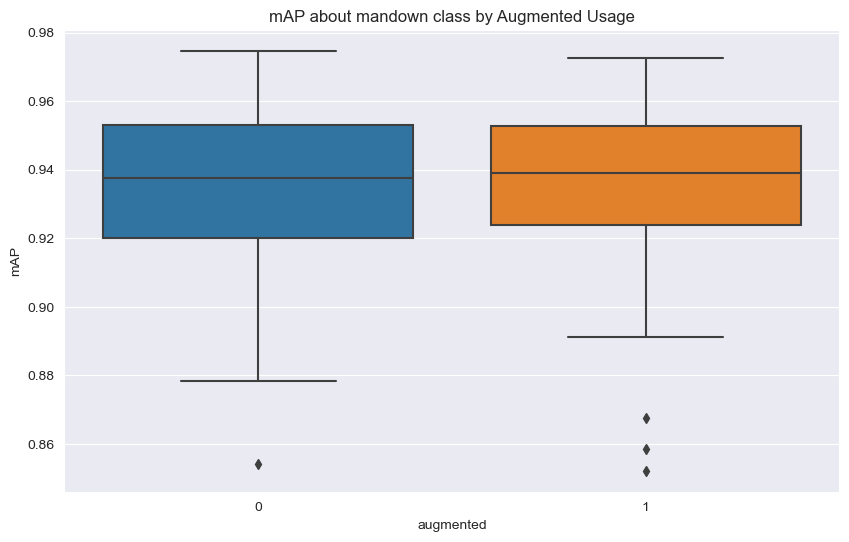

In [83]:
# augmented에 따른 mandown category의 mAP 평균 계산
augmented_Group = df.groupby('augmented')['mandown_acc'].mean()
print("augmented별 mAP 평균", "0=augmented 사용 안함 // 1 = augmented 사용함")
print(augmented_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='mAP', data=df)
plt.title('mAP about mandown class by Augmented Usage')
plt.show()

augmented별 mAP 평균 0=augmented 사용 안함 // 1 = augmented 사용함
augmented
0    0.909992
1    0.907786
Name: cross_acc, dtype: float64


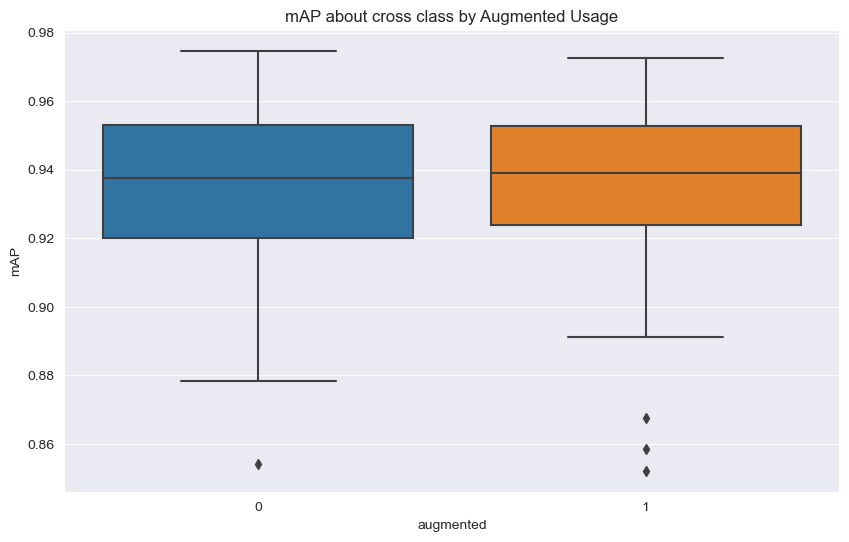

In [84]:
# augmented에 따른 cross category의 mAP 평균 계산
augmented_Group = df.groupby('augmented')['cross_acc'].mean()
print("augmented별 mAP 평균", "0=augmented 사용 안함 // 1 = augmented 사용함")
print(augmented_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='mAP', data=df)
plt.title('mAP about cross class by Augmented Usage')
plt.show()

conv별 mAP 평균
conv
1    0.932955
2    0.936783
3    0.933348
4    0.932892
5    0.939115
6    0.942207
Name: mAP, dtype: float64


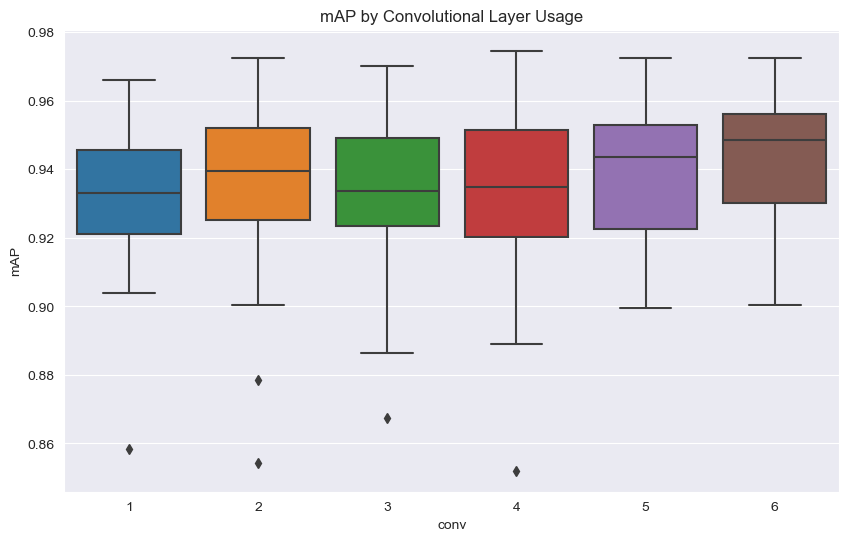

In [85]:
# conv에 따른 mAP 평균 계산
conv_Group = df.groupby('conv')['mAP'].mean()
print("conv별 mAP 평균")
print(conv_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='conv', y='mAP', data=df)
plt.title('mAP by Convolutional Layer Usage')
plt.show()

frame별 mAP 평균
frame
1     0.922912
3     0.936911
5     0.953706
7     0.943909
9     0.925496
11    0.934367
Name: mAP, dtype: float64


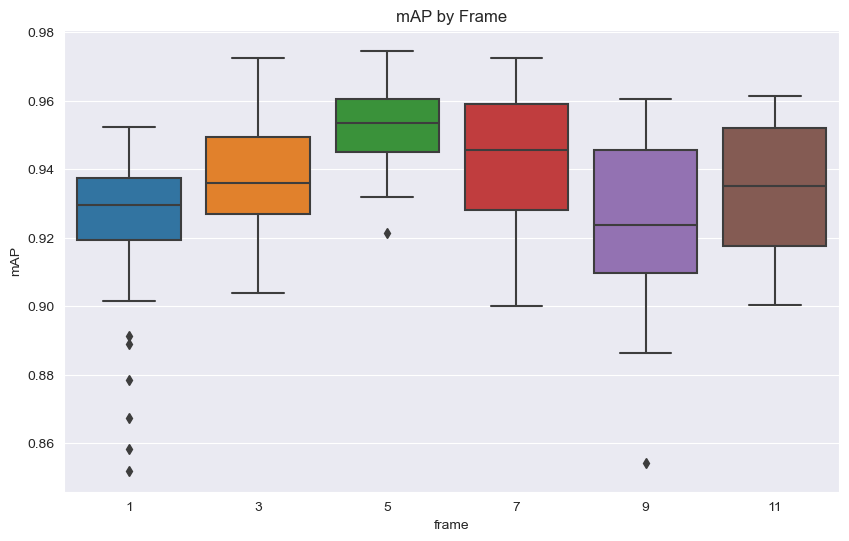

In [86]:
# frame에 따른 mAP 평균 계산
frame_Group = df.groupby('frame')['mAP'].mean()
print("frame별 mAP 평균")
print(frame_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='frame', y='mAP', data=df)
plt.title('mAP by Frame')
plt.show()

ece_group_Group
Group
0    0.510727
1    0.516857
Name: ECE, dtype: float64


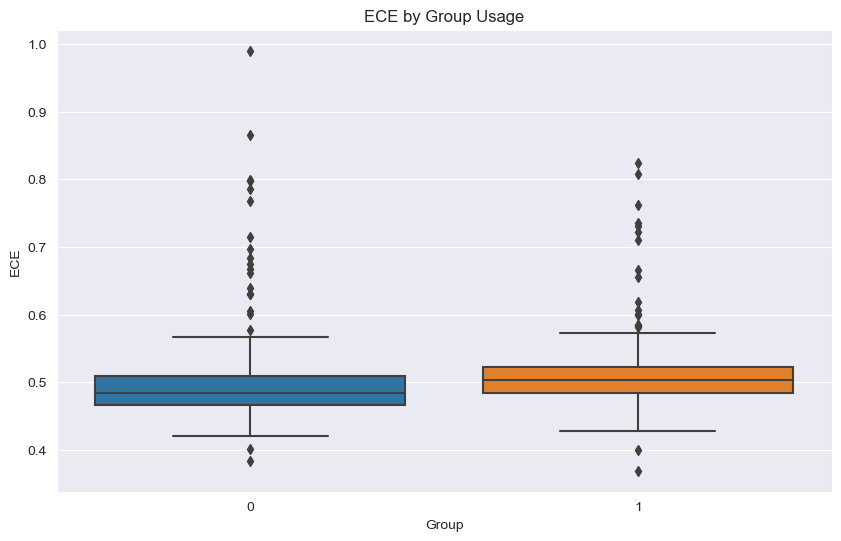

In [87]:
# Group by group usage and calculate mean ECE
ece_group_Group = df.groupby('Group')['ECE'].mean()
print("ece_group_Group")
print(ece_group_Group)
print('==============================================================================')
# Boxplot of mAP by Group usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='ECE', data=df)
plt.title('ECE by Group Usage')
plt.show()

ece_LSTM_Group
LSTM
0    0.516753
1    0.510831
Name: ECE, dtype: float64


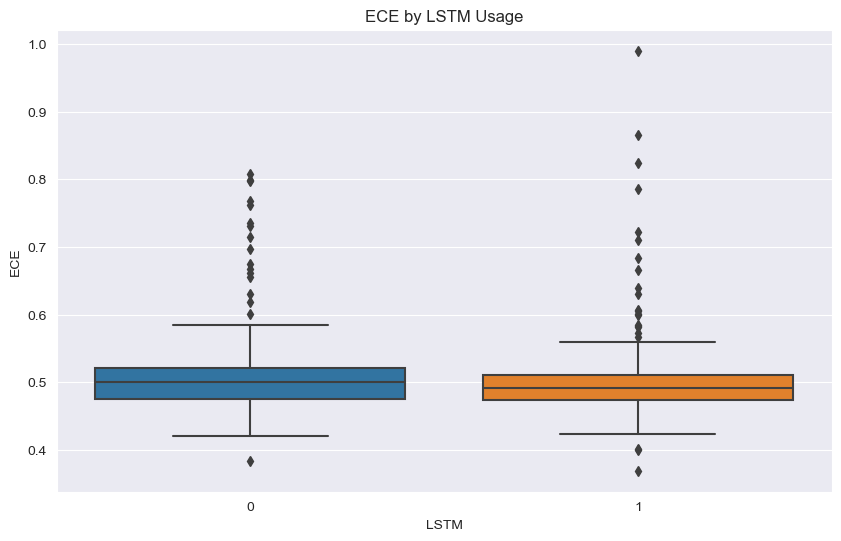

In [88]:
# Group by LSTM usage and calculate mean ECE
ece_LSTM_Group = df.groupby('LSTM')['ECE'].mean()
print("ece_LSTM_Group")
print(ece_LSTM_Group)
print('==============================================================================')
# Boxplot of mAP by LSTM usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='LSTM', y='ECE', data=df)
plt.title('ECE by LSTM Usage')
plt.show()

ece_augmented_Group
augmented
0    0.556829
1    0.470755
Name: ECE, dtype: float64


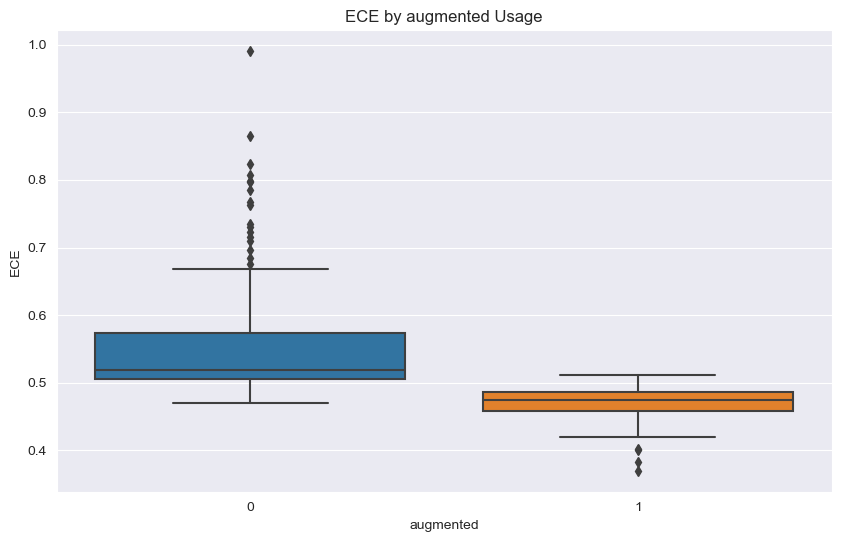

In [89]:
# Group by augmented usage and calculate mean ECE
ece_augmented_Group = df.groupby('augmented')['ECE'].mean()
print("ece_augmented_Group")
print(ece_augmented_Group)
print('==============================================================================')
# Boxplot of mAP by augmented usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='ECE', data=df)
plt.title('ECE by augmented Usage')
plt.show()

ece_conv_Group
conv
1    0.499017
2    0.519755
3    0.513509
4    0.515182
5    0.510452
6    0.524838
Name: ECE, dtype: float64


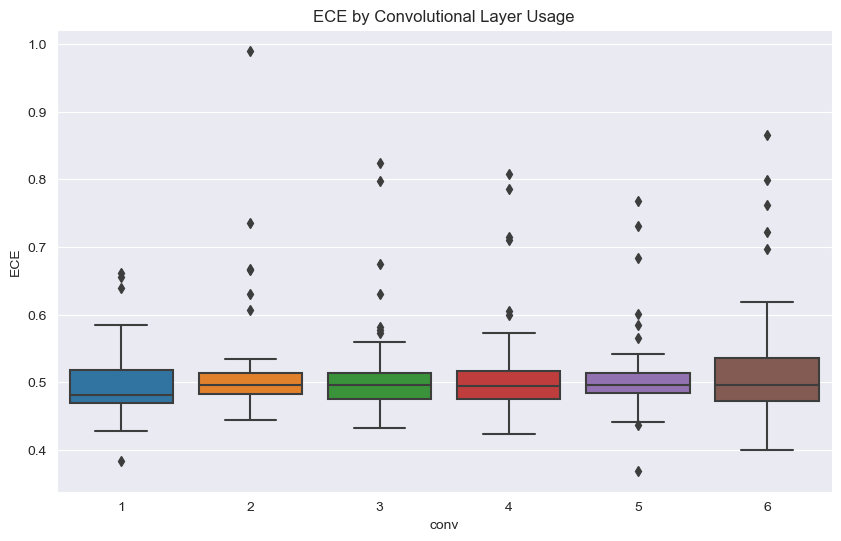

In [90]:
# Group by conv and calculate mean ECE
ece_conv_Group = df.groupby('conv')['ECE'].mean()
print("ece_conv_Group")
print(ece_conv_Group)
print('==============================================================================')
# Boxplot of mAP by conv
plt.figure(figsize=(10, 6))
sns.boxplot(x='conv', y='ECE', data=df)
plt.title('ECE by Convolutional Layer Usage')
plt.show()

ece_frame_Group
frame
1     0.590793
3     0.486101
5     0.518045
7     0.473646
9     0.520029
11    0.494139
Name: ECE, dtype: float64


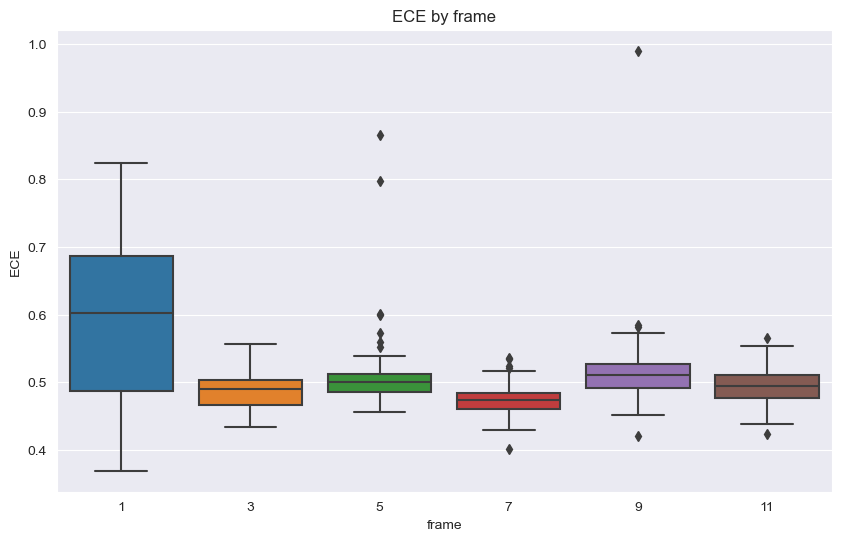

In [91]:
# Group by frame and calculate mean ECE
ece_frame_Group = df.groupby('frame')['ECE'].mean()
print("ece_frame_Group")
print(ece_frame_Group)
print('==============================================================================')
# Boxplot of mAP by frame
plt.figure(figsize=(10, 6))
sns.boxplot(x='frame', y='ECE', data=df)
plt.title('ECE by frame')
plt.show()